  
[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

\newpage

# Learning objectives
At the end of this lecture you should be able to:   

* Define scalars, vectors, and tensors
* Peform vector scaling and addition
* Construct rotation tensors
* Use rotation tensors to rotate vectors

# Scalars, vectors, and tensors

* A [**scalar**](https://en.wikipedia.org/wiki/Scalar_(mathematics)) can be loosely defined as a single number. An example of a scalar physical quantity is the temperature at a point, i.e. the temperature just has magnitude not direction and can therefore be expressed by just one number.   

An example of a scalar: $a=1$

* A [**vector**](https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)) is a quantity with both magnitude and direction. An example of a physical vector quantity is the displacement of motion of a point, i.e. to define a general displacement we need both the magnitude of the displacement as well as the direction. vectors are often denoted by a column array. An example of a vector: 
$$\mathbf{a}=\begin{bmatrix} a_x \\ a_y\end{bmatrix}=\begin{bmatrix} a_1 \\ a_2\end{bmatrix}$$


* A [**tensor**](https://en.wikipedia.org/wiki/Tensor), in the context of continuum mechanics, is a quantity which can linearly map vectors to vectors (or tensors to tensors). An example of a tensor is a rotation tensor which may rotate a vector. Second order tensors (scalars and vectors are 0-th and 1st order tensors respectively) are often denoted by a square matrix. An example of a 2D 2nd order tensor: 

$$\mathbf{A}=\begin{bmatrix} a_{xx} & a_{xy} \\ a_{yx} & a_{yy} \end{bmatrix}=\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$$

An example of a 3D 2nd order tensor: 
$$\mathbf{A}=\begin{bmatrix} a_{xx} & a_{xy} & a_{xz} \\ a_{yx} & a_{yy} & a_{yz} \\ a_{zx} & a_{zy} & a_{zz} \end{bmatrix}=\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix}$$
   
    
  
See also: _Itskov 2013, Tensor Algebra and Tensor Analysis for Engineerings, Chapter 1._

# Rotation tensor
Lets define a general vector in 3D space denoted $\mathbf{a}$: 
$$\mathbf{a}=\begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}=\begin{bmatrix} a_x \\ a_y \\ a_z \end{bmatrix}$$

Counter-clockwise rotation of a vector $\mathbf{a}$ to $\mathbf{a}'$ around the 3rd or z-axis by an angle $\alpha$ can be written as:
$$a'_1=\cos(\alpha) \cdot a_1 - \sin(\alpha) \cdot a_2$$
$$a'_2=\sin(\alpha) \cdot a_1 + \cos(\alpha) \cdot a_2$$
$$a'_3=a_3$$
  
It is convenient to "gather this" in a rotationa matrix $\mathbf{R}$:
$$\mathbf{a}'=\mathbf{R}\mathbf{a}=\begin{bmatrix} \cos(\alpha) & -\sin(\alpha) & 0 \\ \sin(\alpha) & \cos(\alpha) & 0 \\ 0 & 0 & 1\end{bmatrix}\begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix}=\begin{bmatrix} \cos(\alpha) \cdot a_1 -\sin(\alpha) \cdot a_2 \\ \sin(\alpha) \cdot a_1  + \cos(\alpha) \cdot a_2 \\ 0\end{bmatrix}$$


**Observation**: If a rotation is around one of the main axis e.g. the $n^{th}$ direction (with x,y,z relating to direction 1, 2, and 3), then $R_{nn}$ is 1 while the other components in the $n^{th}$ row and column are 0. 

$$\mathbf{R}=\begin{bmatrix} \cos(\alpha) & -\sin(\alpha) & 0 \\ \sin(\alpha) & \cos(\alpha) & 0 \\ 0 & 0 & 1\end{bmatrix}$$

Note: The [Wikipedia article on rotation matrices](https://en.wikipedia.org/wiki/Rotation_matrix) is quite good. 

## Numerical implementation


In [8]:
a=[1; 0; 0] % A vector
alpha=pi/4; % The rotation angle around e3
R=[cos(alpha) -sin(alpha) 0;...
   sin(alpha)  cos(alpha) 0;...
   0           0          1]; % Rotation tensor
a_p=R*a

a =

   1
   0
   0

a_p =

   0.70711
   0.70711
   0.00000



## Rotating sets of coordinates
An array of coordinates e.g. an nx3 array of n 3D nodes, is essentially a collection of position vectors and can be rotated using a rotation matrix. 

For instance the coordinate array $\begin{Bmatrix} \mathbf{X} \end{Bmatrix}$ is rotated using: 

$$\begin{Bmatrix} \mathbf{X} \end{Bmatrix}'^\top=\mathbf{R}\begin{Bmatrix} \mathbf{X} \end{Bmatrix}^\top$$

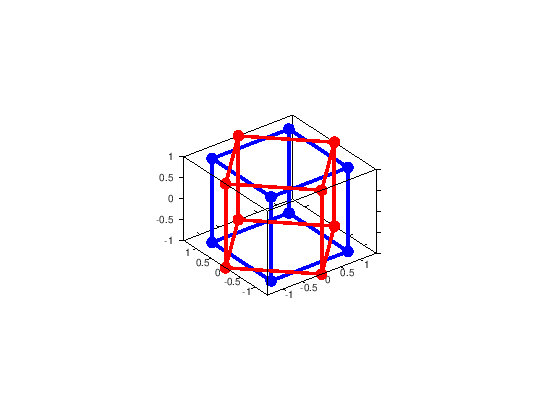

In [2]:
alpha=pi/4; % The rotation angle around e3

% Create a cube
X=[-1;  1; 1; -1; -1;  1; 1; -1;]; % X coordinates
Y=[-1; -1; 1;  1; -1; -1; 1;  1;]; % Y coordinates
Z=[-1; -1;-1; -1;  1;  1; 1;  1;]; % Z coordinates
V=[X(:) Y(:) Z(:)];

R=[cos(alpha) -sin(alpha) 0; sin(alpha)  cos(alpha)  0; 0 0 1]; % Rotation tensor

V2=(R*V')'; % Rotate

% Visualize
l=[1 2 3 4 1 5 6 7 8 5 6 2 3 7 8 4]; % Line description for plot
figure; hold on; % Open figure
plot3(V(l,1),V(l,2),V(l,3),'b.-','MarkerSize',30,'LineWidth',10); % Plot initial
plot3(V2(l,1),V2(l,2),V2(l,3),'r.-','MarkerSize',30,'LineWidth',10); % Plot final
view(3); axis equal; axis tight; box on; % Axis settings

\newpage

**About this document**    

This document was created using a [Jupyter notebook](https://jupyter.org/) which allows for the presentation of theory and equations, as well as live (running code) numerical implementations. 

This Jupyter notebook is available [open source](https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101) and features the [Octave](https://www.gnu.org/software/octave/index) programming language (an open source alternative to MATLAB). If you are interested in running this Jupyter notebook yourself [download and install Octave](https://www.gnu.org/software/octave/download) and install [the Jupyter environment](https://jupyter.org/install). Once both Jupyter and Octave are installed follow [these instructions](https://github.com/calysto/octave_kernel) to configure the use of Octave with Jupyter notebooks. 

To run Jupyter call `jupyter notebook` from your Terminal/Command Prompt. 